# Lecture 19

Decision trees are versatile machine learning algorithms that can perform both classification and regression tasks, and even multioutput tasks

Decision trees are also the fundamental components of random forests, which are among the most powerful machine learning algorithms available today.

Let's define the default font sizes to make the figures prettier:

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist)

In [11]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Training and Visualizing a Decision Tree

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [13]:
iris = load_iris(as_frame=True)

In [14]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [16]:
X_iris[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [17]:
y_iris[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

You can visualize the trained decision tree by first using the `export_graphviz()` function to output a graph definition file called `iris_tree.dot`:

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Your first decision tree looks like:

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  

## Making Predictions

Let's see how the tree represented in Figure above makes predictions.

Suppose you find an iris flower and you want to classify it based on its petals

- You start at the root node (depth 0, at the top)
    - this node asks whether the flower’s petal length is smaller than 2.45 cm
- If it is, then you move down to the root’s left child node (depth 1, left)
    - In this case, it is a leaf node (i.e., it does not have any child nodes)
    - simply look at the predicted class for that node, and the decision tree predicts that your flower is an Iris setosa (`class=setosa`)
- Now suppose you find another flower, and this time the petal length is greater than 2.45 cm
- You again start at the root but now move down to its right child node (depth 1, right)
- This is not a leaf node, it’s a split node
    - so it asks another question: is the petal width smaller than 1.75 cm?
    - If it is, then your flower is most likely an Iris versicolor (depth 2, left)
    - If not, it is likely an Iris virginica (depth 2, right). It’s really that simple.

One of the many qualities of decision trees is that they require very little data preparation. **In fact, they don’t require feature scaling or centering at all**

- A node's `samples` attribute counts how many training instances it applies to
    - 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left)
- A node's `value` attribute tells you how many training instances of each class this node applies to
    - for example, the bottom-right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica
- Finally, a node's `gini` attribute measures its Gini impurity

### Gini impurity

$$G_i=1-\sum_{k=1}^{n}p_{i,k}^2$$
- $G_i$ is the Gini impurity of the $i^{th}$ node.
- $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

### Decisioin boundary

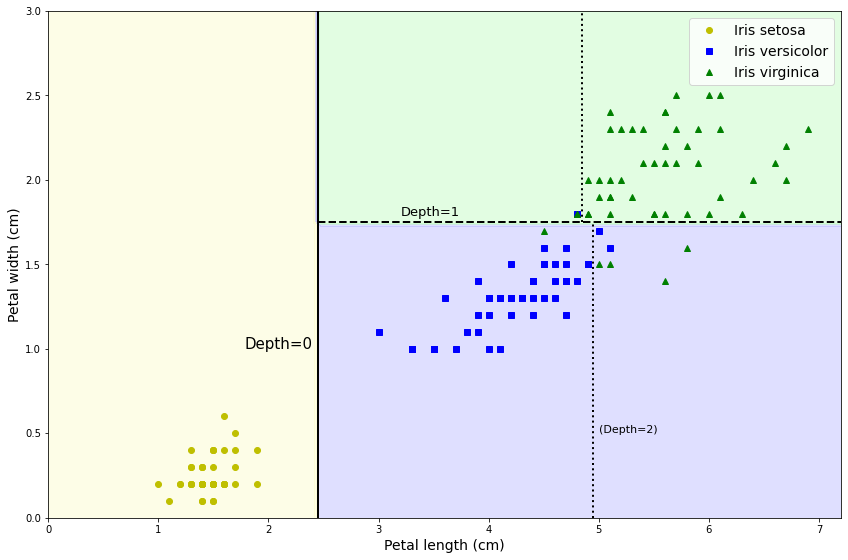

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(12, 8))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

- The thick vertical line represents the decision boundary of the root node (depth 0)
    - petal length = 2.45 cm.
    - Since the lefthand area is pure (only Iris setosa), it cannot be split any further.
- However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line)
    - Since `max_depth` was set to 2, the decision tree stops right there
    - If you set `max_depth` to 3, then the two depth-2 nodes would each add another decision boundary (represented by the two vertical dotted lines).

In [25]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

## Estimating Class Probabilities

A decision tree can also estimate the probability that an instance belongs to a particular class $k$

First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class $k$ in this node

- For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide
- The corresponding leaf node is the depth-2 left node, so the decision tree outputs the following probabilities
    - 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54)
- And if you ask it to predict the class, it outputs Iris versicolor (class 1) because it has the highest probability

In [26]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [27]:
tree_clf.predict([[5, 1.5]])

array([1])

Notice that the estimated probabilities would be identical anywhere else in the bottom-right rectangle of the decision boundary plot

## The CART Training Algorithm

Scikit-Learn uses the *Classification and Regression Tree* (CART) algorithm to train decision trees (also called “growing” trees)

The algorithm works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$ (e.g., “petal length ≤ 2.45 cm”)

How does it choose $k$ and $t_k$? It searches for the pair $(k, t_k)$ that produces the purest subsets, weighted by their size

### CART cost function for classification

$$J(k,t_k)=\frac{m_{\text{left}}}{m}G_{\text{left}}+ \frac{m_{\text{right}}}{m}G_{\text{right}}$$
where
- $G_{\text{left/right}}$ measures the impurity of the left/right subset
- $m_{\text{left/right}}$ is the number of instances in the left/right subset

- Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively
- It stops recursing once it reaches the maximum depth (defined by the `max_depth` hyperparameter), or if it cannot find a split that will reduce impurity
- A few other hyperparameters (described in a moment) control additional stopping conditions: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, and `max_leaf_nodes`.

## Regularization Hyperparameters